## Сюй Минчуань, гр. 517, задание 8 домашки 2
- $\alpha = \beta = 0.5, \gamma = \delta_{out} = 0, \delta_{in}$ неизвестно
- Постройте зависимость логарифма вероятности данного графа при данных значениях параметров (правдоподобия графа) от $\delta_{in}$
- Найдите оптимальное значение, при котором появление такого графа наиболее правдоподобно.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from datetime import datetime

Начальный граф

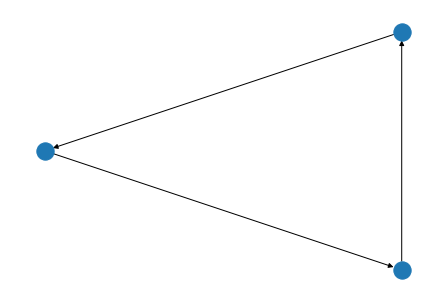

In [2]:
G_start = nx.DiGraph()
G_start.add_nodes_from([0,1,2])
G_start.add_edges_from([(0,1),(1,2),(2,0)])
nx.draw_shell(G_start)

Пусть $G(t-1)$ построен с $n_{t-1}$ вершинами, следующий шаг:
1. С вероятностью $\alpha = 0.5$: новая вершина $v*$ и ребро v*->v , где $v$ выбрать из существующих $n_{t-1}$ с вероятностью $\frac{indeg\, v +\delta_{in}}{t-1+\delta_{in}n_{t-1}}$.
2. С вероятностью $\beta = 0.5$: нет новой вершины, есть v->w, где $v,w$ выбрать из существующих $n_{t-1}$ независимо с вероятностью $\frac{outdeg\, v }{t-1}$ и $\frac{indeg\, v +\delta_{in}}{t-1+\delta_{in}n_{t-1}}$.

In [38]:
graph_data = np.loadtxt('graph.txt', skiprows=3)
graph_data = graph_data.astype('int')
print(graph_data.shape)

(25027, 2)


In [41]:
def calculate_prob_log(delta_in, data, G): # log(c) = log(a) + log(b), when c=a*b
    alpha_log = np.log(0.5)
    beta_log = np.log(0.5)
    prob_log = 0
    for i in range(data.shape[0]):
        if data[i][0] not in G.nodes(): # the first situation: new node, t = i+4
            prob_log += alpha_log + np.log( (G.in_degree(data[i][1]) + delta_in) / ((i+4)-1 + delta_in * G.number_of_nodes()) )
            G.add_node(i+3)
            G.add_edge(data[i][0], data[i][1])
        else: # the second situation: no new node
            prob_log += beta_log + np.log(G.out_degree(data[i][0])/(i+3) ) \
                + np.log( (G.in_degree(data[i][1])+delta_in) / (i+3 + delta_in*G.number_of_nodes()) )
            G.add_edge(data[i][0], data[i][1])
    return prob_log

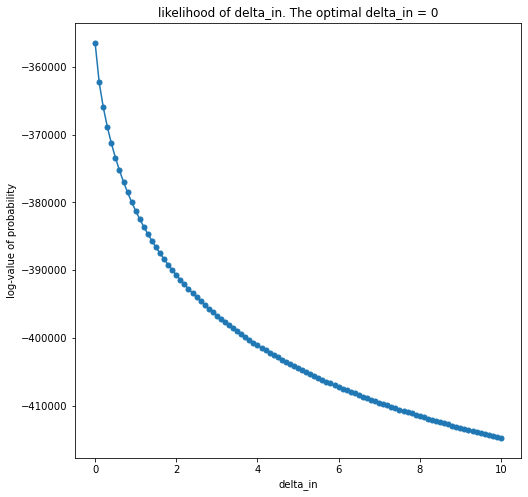

In [54]:
delta_in_list = np.linspace(0,10,101)
prob_list = [calculate_prob_log(delta_in= i, data = graph_data, G = G_start) for i in delta_in_list]

plt.figure(figsize=(8,8))
plt.plot(delta_in_list, prob_list, marker = 'o', markersize = 5)
plt.xlabel("delta_in")
plt.ylabel("log-value of probability")
# plt.yscale('log')
plt.title("likelihood of delta_in. The optimal delta_in = 0")
plt.show()